In [1]:
# MNIST

# 딥러닝 아키텍처
# 입력층: Flatten() 함수를 이용해서 28x28 크기의 2차원 이미지를 784개 길이를 갖는 1차원 벡터로 변환해서 은닉층으로 전달
# 은닉층: 1개 이상. 은닉층 개수와 노드의 개수는 하이퍼 파라미터, 주어진 환경 그리고 성능 등을 고려하여 최적의 값을 찾아야 함
# 출력층: 노드의 개수는 정답의 범주와 같은 개수. 여기서는 10개

# 개발 프로세스
# 데이터 정의 > 전처리 > 모델 구축 > 모델 컴파일 > 학습 > 모델 평가

# 데이터 전차리: 정규화, 표준화, 원핫인코딩
# 정규화: MinMx 공식을 이용해 모든 데이터의 범위를 0~1 사이의 값으로 변화
# 표준화: 평균과 표준편차를 이용해 특정 범위 이상의 데이터는 outlier로 간주하여 제거
# 원핫인코딩: 정답 개수와 동일한 크기를 가지는 리스트를 만든 후에, 정답 인덱스에는 1을 넣고 나머지는 0을 넣음. 리스트에서 가장 큰 값을 가지는 인덱스를 정답으로 인식


In [3]:
# 데이터 정의
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
print("x_train.shape = ", x_train.shape)
print("t_train.shape = ", t_train.shape)
print("x_test.shape = ", x_test.shape)
print("t_test.shape = ", t_test.shape)

x_train.shape =  (60000, 28, 28)
t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
t_test.shape =  (10000,)


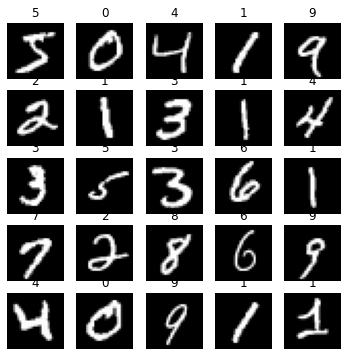

In [4]:
# 데이터 확인(이미지)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train[index]))
plt.show()

In [5]:
# 데이터 전처리
# 학습데이터, 테스트데이터 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답데이터 원핫인코딩
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10) # num_classes=10 지정하여 10개의 리스트를 만들어서 원핫인코딩 수행함
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [8]:
# 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 학습
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 1s 788us/step - loss: 0.5295 - accuracy: 0.8545 - val_loss: 0.1958 - val_accuracy: 0.9421
Epoch 2/30
1313/1313 [==============================] - 1s 639us/step - loss: 0.1572 - accuracy: 0.9549 - val_loss: 0.1376 - val_accuracy: 0.9598
Epoch 3/30
1313/1313 [==============================] - 1s 619us/step - loss: 0.1056 - accuracy: 0.9691 - val_loss: 0.1298 - val_accuracy: 0.9611
Epoch 4/30
1313/1313 [==============================] - 1s 617us/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.1152 - val_accuracy: 0.9667
Epoch 5/30
1313/1313 [==============================] - 1s 623us/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.1060 - val_accuracy: 0.9687
Epoch 6/30
1313/1313 [==============================] - 1s 620us/step - loss: 0.0426 - accuracy: 0.9876 - val_loss: 0.1059 - val_accuracy: 0.9703
Epoch 7/30
1313/1313 [==============================] - 1s 618us/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.1095 -

In [10]:
# 모델 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 364us/step - loss: 0.1542 - accuracy: 0.9731


[0.15421029925346375, 0.9731000065803528]

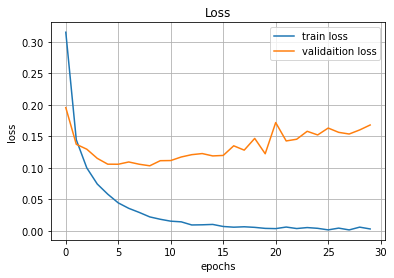

In [11]:
# 손실
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validaition loss')
plt.legend(loc='best')
plt.show()

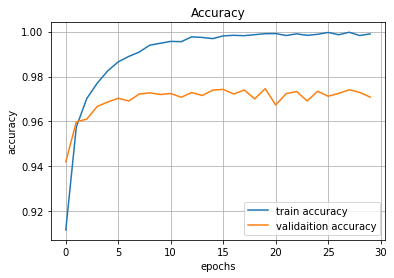

In [12]:
# 정확도
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validaition accuracy')
plt.legend(loc='best')
plt.show()

In [13]:
# overfitting의 사례: train accuracy > validation accuracy

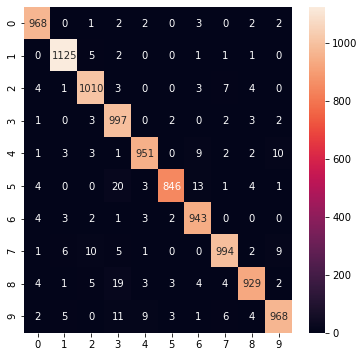

In [14]:
# 혼동행렬: 어떤 데이터를 잘 맞추고, 어떤 데이터를 어려워 하는지 확인
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test) # 테스트 입력데이터에 대한 prediction 실행
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predicted_value, axis=-1)) # 테스트데이터 정답과 비교

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [16]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') %(i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i])))

[[ 968    0    1    2    2    0    3    0    2    2]
 [   0 1125    5    2    0    0    1    1    1    0]
 [   4    1 1010    3    0    0    3    7    4    0]
 [   1    0    3  997    0    2    0    2    3    2]
 [   1    3    3    1  951    0    9    2    2   10]
 [   4    0    0   20    3  846   13    1    4    1]
 [   4    3    2    1    3    2  943    0    0    0]
 [   1    6   10    5    1    0    0  994    2    9]
 [   4    1    5   19    3    3    4    4  929    2]
 [   2    5    0   11    9    3    1    6    4  968]]


label = 0	(968/980)	accuracy = 0.988
label = 1	(1125/1135)	accuracy = 0.991
label = 2	(1010/1032)	accuracy = 0.979
label = 3	(997/1010)	accuracy = 0.987
label = 4	(951/982)	accuracy = 0.968
label = 5	(846/892)	accuracy = 0.948
label = 6	(943/958)	accuracy = 0.984
label = 7	(994/1028)	accuracy = 0.967
label = 8	(929/974)	accuracy = 0.954
label = 9	(968/1009)	accuracy = 0.959
